<a href="https://colab.research.google.com/github/MetronWard/hands_on_ml/blob/main/Penguin_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Penguins

# Initializing Kaggle
* Install kaggle
* Make the kaggle folder
* Transfer kaggle.json into the kaggle folder
* Change the file permission of kaggle.json
* Download the dataset

In [66]:
!cp kaggle.json ~/.kaggle/

In [67]:
!chmod 600 ~/.kaggle/kaggle.json

In [68]:
!kaggle datasets download -d youssefaboelwafa/clustering-penguins-species

clustering-penguins-species.zip: Skipping, found more recently modified local copy (use --force to force download)


# Reading and Exploring the Dataset

In [69]:
from zipfile import ZipFile

zip_file = ZipFile("/content/clustering-penguins-species.zip")
zip_file.extractall()
zip_file.close()

In [70]:
import pandas as pd
penguins = pd.read_csv("/content/penguins.csv")

In [71]:
penguins.head(2)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE


In [72]:
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [73]:
penguins.duplicated().sum()

1

In [74]:
penguins.drop_duplicates(inplace=True)

In [75]:
import numpy as np
def drop_outliers(data, columns):
    for item in columns:
        q1 = data[item].quantile(0.25)
        q3 = data[item].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5*iqr
        upper = q3 + 1.5*iqr
        upper_array = np.where(data[item]>=upper)[0]
        lower_array = np.where(data[item]<=lower)[0]

        # Removing the outliers
        data.drop(index=upper_array, inplace=True)
        data.drop(index=lower_array, inplace=True)
    return data

In [76]:
numerical_data = ["body_mass_g", "flipper_length_mm", "culmen_depth_mm", "culmen_length_mm"]
penguins = drop_outliers(penguins, numerical_data)

# Defining Pipeline

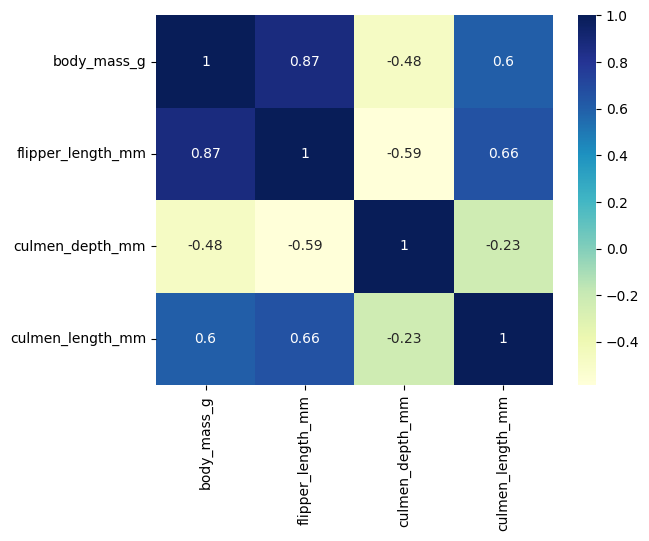

In [77]:
import seaborn as sns
sns.heatmap(penguins[numerical_data].corr(), cmap="YlGnBu", annot=True);

In [78]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA


numerical_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encode", OneHotEncoder())
])

col_transformer = ColumnTransformer([
    ("numericals", numerical_pipeline, numerical_data),
    ("categorical", categorical_pipeline, ["sex"])
])

full_pipeline = Pipeline([
    ("transformers", col_transformer),
    ("PCA", PCA(n_components=2))
])

# Training Model


In [79]:
data_prepared = full_pipeline.fit_transform(penguins)

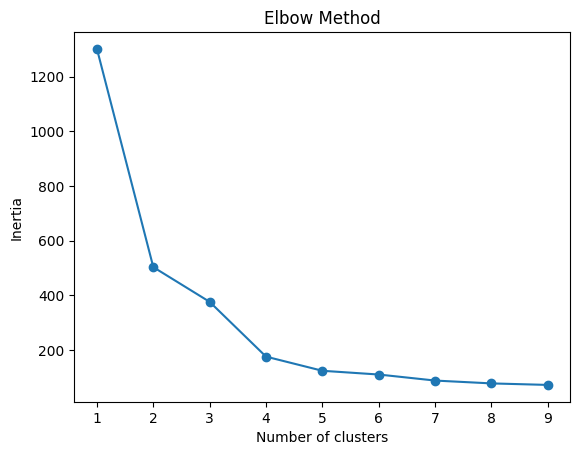

In [80]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(data_prepared)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

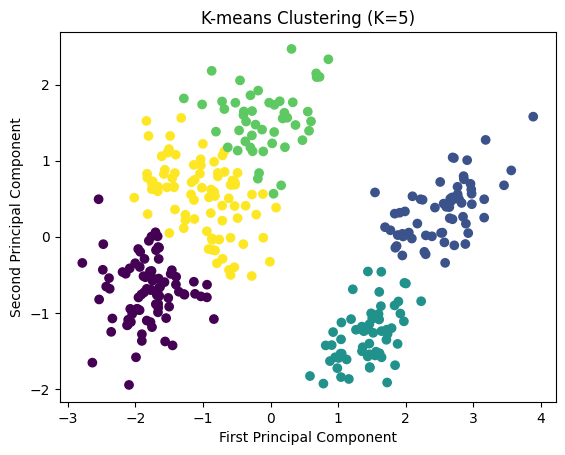

In [81]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init="auto").fit(data_prepared)
plt.scatter(data_prepared[:, 0], data_prepared[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={5})")
plt.show()